# **1. Problem Statement**

### **What drives property prices in Pakistan?**

The real estate sector in Pakistan is rapidly expanding, with property listings varying widely by city, area, and property type. However, investors, buyers, and developers often lack data-driven insights into what factors most strongly influence property prices. This project seeks to answer a key business question:

What are the primary factors that drive property prices in Pakistan’s real estate market, as reflected in listings on Zameen.com?

We aim to explore whether variables like location, property size, number of bedrooms, and type of property significantly impact pricing. Understanding these relationships will help stakeholders make more informed investment decisions and identify emerging market trends across different regions.

# **2. Data Understanding & Preprocessing**

In [173]:
from google.colab import files
uploaded = files.upload()


Saving Scarped Zameen.com.xlsx to Scarped Zameen.com (3).xlsx


In [174]:
import pandas as pd
import numpy as np

In [175]:
#Loading the Data file and displaying rows
df = pd.read_excel("Scarped Zameen.com.xlsx")
display(df.head())
print(df.shape)

Title  \
0  Hmr Waterfront 2 Bed Room Premium Apartment On...   
1  Chance Deal! Luxury 2 Bedroom Seafront Apartme...   
2  Luxury 1 Bed At H& S Residence By Japanese Arc...   
3  Luxury 1 Bed Seafront Apartment at HMR waterfr...   
4  2 Bed Apartment For Booking On 3 Years | Saima...   

                                                 URL     City  Type  \
0  https://www.zameen.com/Property/dha_phase_8_hm...  Karachi  Flat   
1  https://www.zameen.com/Property/dha_defence_dh...  Karachi  Flat   
2  https://www.zameen.com/Property/dha_phase_8_hm...  Karachi  Flat   
3  https://www.zameen.com/Property/dha_phase_8_hm...  Karachi  Flat   
4  https://www.zameen.com/Property/dha_phase_8_hm...  Karachi  Flat   

          Area            Price   Purpose                     Location  \
0  128 Sq. Yd.  PKR\n4.75 Crore  For Sale  DHA Defence, Karachi, Sindh   
1  161 Sq. Yd.  PKR\n6.25 Crore  For Sale  DHA Defence, Karachi, Sindh   
2  111 Sq. Yd.  PKR\n3.45 Crore  For Sale  DHA Defence, Karachi, Sindh   
3  106 Sq. Yd.  PKR\n2.98 Crore  For Sale  DHA Defence, Karachi, Sindh   
4  156 Sq. Yd.  PKR\n4.65 Crore  For Sale  DHA Defence, Karachi, Sindh   

                                         Description  Built in year  ...  \
0  SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...            NaN  ...   
1  Live the Seafront Dream at H&S Residence \n2 B...            NaN  ...   
2  Live the Seafront Dream at H&S Residence \n1 B...            NaN  ...   
3  Chance Deal at HMR Waterfront 1-Bed Apartment ...            2.0  ...   
4  HMR WATERFRONT \n\nOwn Your Dream Apartment in...            NaN  ...   

   Nearby Schools  Nearby Hospitals  Nearby Shopping Malls  \
0             NaN               NaN                    NaN   
1             NaN               NaN                    NaN   
2             NaN               NaN                    NaN   
3             NaN               NaN                    NaN   
4             NaN               NaN                    NaN   

   Nearby Restaurants  Distance From Airport (kms)  \
0                 NaN                          NaN   
1                 NaN                          NaN   
2                 NaN                          NaN   
3                 NaN                          NaN   
4                 NaN                          NaN   

   Nearby Public Transport Service  Other Nearby Places  Maintenance Staff  \
0                              NaN                  NaN                NaN   
1                              NaN                  NaN                NaN   
2                              NaN                  NaN                NaN   
3                              NaN                  NaN                NaN   
4                              NaN                  NaN                NaN   

   Security Staff  Other Facilities  
0             NaN               NaN  
1             NaN               NaN  
2             NaN               NaN  
3             NaN               NaN  
4             NaN               NaN  

[5 rows x 59 columns]

(18255, 59)


In [176]:
#Summary of the dataset
df.info()

#See all the column names
print("Columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            18239 non-null  object 
 1   URL                              18255 non-null  object 
 2   City                             18255 non-null  object 
 3   Type                             18239 non-null  object 
 4   Area                             18239 non-null  object 
 5   Price                            18239 non-null  object 
 6   Purpose                          18239 non-null  object 
 7   Location                         18239 non-null  object 
 8   Description                      14893 non-null  object 
 9   Built in year                    11940 non-null  float64
 10  Parking Spaces                   9656 non-null   float64
 11  Double Glazed Windows            0 non-null      float64
 12  Central Air Condit

In [177]:
#finding duplicates
df.duplicated().sum()
#there are no duplicates in the dataset

np.int64(0)

In [178]:
#Cleaning the price column

#Viewing first 10 values of the Price column
df['Price'].head(10)

0    PKR\n4.75 Crore
1    PKR\n6.25 Crore
2    PKR\n3.45 Crore
3    PKR\n2.98 Crore
4    PKR\n4.65 Crore
5     PKR\n2.6 Crore
6    PKR\n6.75 Crore
7    PKR\n1.68 Crore
8       PKR\n8 Crore
9     PKR\n4.4 Crore
Name: Price, dtype: object

In [179]:
df['Price'] = df['Price'].astype(str)

#Removing PKR, commas, and extra spaces
df['Price'] = df['Price'].str.replace('PKR', '', regex=False)
df['Price'] = df['Price'].str.replace(',', '', regex=False)
df['Price'] = df['Price'].str.strip()

#Cleaned column
df[['Price']].head(10)

Price
0  4.75 Crore
1  6.25 Crore
2  3.45 Crore
3  2.98 Crore
4  4.65 Crore
5   2.6 Crore
6  6.75 Crore
7  1.68 Crore
8     8 Crore
9   4.4 Crore

In [180]:
#Converting price to numbers
def convert_price_to_number(value):
    try:
        value = value.lower().strip()
        if 'crore' in value:
            num = float(value.split()[0])
            return num * 10000000
        elif 'lac' in value or 'lakh' in value:
            num = float(value.split()[0])
            return num * 100000
        else:
            return float(value)
    except:
        return None

In [181]:
#Named column of converted values as 'Price_Cleaned'
df['Price_cleaned'] = df['Price'].apply(convert_price_to_number)

In [182]:
df[['Price', 'Price_cleaned']].head(10)

Price  Price_cleaned
0  4.75 Crore     47500000.0
1  6.25 Crore     62500000.0
2  3.45 Crore     34500000.0
3  2.98 Crore     29800000.0
4  4.65 Crore     46500000.0
5   2.6 Crore     26000000.0
6  6.75 Crore     67500000.0
7  1.68 Crore     16800000.0
8     8 Crore     80000000.0
9   4.4 Crore     44000000.0

In [183]:
#Converting Area of Properties into a uniform measuring values i.e. Sqft

df[['Area']].head(10)

Area
0  128 Sq. Yd.
1  161 Sq. Yd.
2  111 Sq. Yd.
3  106 Sq. Yd.
4  156 Sq. Yd.
5  217 Sq. Yd.
6  240 Sq. Yd.
7  200 Sq. Yd.
8  300 Sq. Yd.
9  189 Sq. Yd.

In [184]:
df['Area'] = df['Area'].astype(str).str.lower().str.strip()
df[['Area']].head(10)

Area
0  128 sq. yd.
1  161 sq. yd.
2  111 sq. yd.
3  106 sq. yd.
4  156 sq. yd.
5  217 sq. yd.
6  240 sq. yd.
7  200 sq. yd.
8  300 sq. yd.
9  189 sq. yd.

In [185]:
#Converting area units from Sq.Yd. into Sq.ft., where 1 square yard = 9 sqft

def convert_area_to_sqft(value):
    try:
        num = float(value.split()[0])

        if 'sq. yd.' in value or 'sq. yd.' in value:
            return num * 9
        elif 'marla' in value:
            return num * 272.25
        elif 'kanal' in value:
            return num * 5445
        elif 'sq.ft.' in value or 'sqft' in value:
            return num
        else:
            return None
    except:
        return None


In [186]:
#Named column of converted values as 'Area_sqft'
df['Area_sqft'] = df['Area'].apply(convert_area_to_sqft)

df[['Area', 'Area_sqft']].head(10)

Area  Area_sqft
0  128 sq. yd.     1152.0
1  161 sq. yd.     1449.0
2  111 sq. yd.      999.0
3  106 sq. yd.      954.0
4  156 sq. yd.     1404.0
5  217 sq. yd.     1953.0
6  240 sq. yd.     2160.0
7  200 sq. yd.     1800.0
8  300 sq. yd.     2700.0
9  189 sq. yd.     1701.0

# **3. Missing Values Treatment**

In [187]:
#Identifying missing values

df.isnull().sum()

Title                   16
URL                      0
City                     0
Type                    16
Area                     0
                     ...  
Maintenance Staff    18255
Security Staff       18255
Other Facilities     18255
Price_cleaned         3587
Area_sqft              224
Length: 61, dtype: int64

In [188]:
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

In [189]:
df['Area_sqft'] = df['Area_sqft'].fillna(df['Area_sqft'].mean())

In [190]:
df['Area_sqft'].isnull().sum()

np.int64(0)

In [191]:
df[df['Price_cleaned'].isnull()][['Price']].head(10)

Price
493   1.15 Arab
683         nan
1277   1.7 Arab
1307  1.25 Arab
1520   1.8 Arab
1597  1.35 Arab
1644   1.1 Arab
1668     1 Arab
1671   1.8 Arab
1672   1.8 Arab

In [192]:
#Converting prices into numbers, missed Arab value conversion
def convert_price_to_number(value):
    try:
        value = value.lower().replace(',', '').strip()

        if 'arab' in value:
            num = float(value.split()[0])
            return num * 1000000000
        elif 'crore' in value:
            num = float(value.split()[0])
            return num * 10000000
        elif 'lac' in value or 'lakh' in value:
            num = float(value.split()[0])
            return num * 100000
        else:
            return float(value)
    except:
        return None

In [193]:
df['Price_cleaned'] = df['Price'].apply(convert_price_to_number)

In [194]:
df[df['Price_cleaned'].isnull()][['Price']].head(10)

Price
683    nan
2178   nan
2447   nan
2469   nan
2748   nan
3215   nan
3764   nan
3787   nan
4165   nan
4279   nan

In [195]:
#Checking Missing values again
df.isnull().sum()

Title                   16
URL                      0
City                     0
Type                     0
Area                     0
                     ...  
Maintenance Staff    18255
Security Staff       18255
Other Facilities     18255
Price_cleaned         3569
Area_sqft                0
Length: 61, dtype: int64

In [196]:
#Dropping empty rows
df = df.dropna(subset=['Price_cleaned'])

In [197]:
df[df['Price_cleaned'].isnull()][['Price']].head(10)

Empty DataFrame
Columns: [Price]
Index: []

In [198]:
df['Price_cleaned'].isnull().sum()

np.int64(0)

In [199]:
#Checking for any non-missing values
print("Maintenance Staff:", df['Maintenance Staff'].notnull().sum())
print("Security Staff:", df['Security Staff'].notnull().sum())
print("Other Facilities:", df['Other Facilities'].notnull().sum())
#No non-missing values

Maintenance Staff: 0
Security Staff: 0
Other Facilities: 0


In [200]:
#Dropping empty rows
df.drop(columns=['Maintenance Staff', 'Security Staff', 'Other Facilities'], inplace=True)

In [201]:
#Checkingto see if the columns were dropped
df.columns

Index(['Title', 'URL', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location',
       'Description', 'Built in year', 'Parking Spaces',
       'Double Glazed Windows', 'Central Air Conditioning', 'Central Heating',
       'Flooring', 'Electricity Backup', 'Waste Disposal', 'Floors',
       'Other Main Features', 'Furnished', 'Bedrooms', 'Bathrooms',
       'Servant Quarters', 'Drawing Room', 'Dining Room', 'Kitchens',
       'Study Room', 'Prayer Room', 'Powder Room', 'Store Rooms', 'Steam Room',
       'Lounge or Sitting Room', 'Laundry Room', 'Other Rooms',
       'Broadband Internet Access', 'Satellite or Cable TV Ready', 'Intercom',
       'Community Lawn or Garden', 'Community Swimming Pool', 'Community Gym',
       'First Aid or Medical Centre', 'Day Care Centre', 'Kids Play Area',
       'Barbeque Area', 'Mosque', 'Community Centre', 'Lawn or Garden',
       'Sauna', 'Jacuzzi', 'Nearby Schools', 'Nearby Hospitals',
       'Nearby Shopping Malls', 'Nearby Restaurants',
       'Di

In [202]:
#Checking Missing values again
df.isnull().sum()

Title                                  0
URL                                    0
City                                   0
Type                                   0
Area                                   0
Price                                  0
Purpose                                0
Location                               0
Description                         2519
Built in year                       5005
Parking Spaces                      6752
Double Glazed Windows              14686
Central Air Conditioning           14686
Central Heating                    14686
Flooring                           14686
Electricity Backup                 14686
Waste Disposal                     14686
Floors                              7560
Other Main Features                14686
Furnished                          14686
Bedrooms                               0
Bathrooms                              0
Servant Quarters                    6705
Drawing Room                       14686
Dining Room                        14686
Kitchens                            3892
Study Room                         14686
Prayer Room                        14686
Powder Room                        14686
Store Rooms                         6720
Steam Room                         14686
Lounge or Sitting Room             14686
Laundry Room                       14686
Other Rooms                        14686
Broadband Internet Access          14686
Satellite or Cable TV Ready        14686
Intercom                           14686
Community Lawn or Garden           14686
Community Swimming Pool            14686
Community Gym                      14686
First Aid or Medical Centre        14686
Day Care Centre                    14686
Kids Play Area                     14686
Barbeque Area                      14686
Mosque                             14686
Community Centre                   14686
Lawn or Garden                     14686
Sauna                              14686
Jacuzzi                            14686
Nearby Schools                     14686
Nearby Hospitals                   14686
Nearby Shopping Malls              14686
Nearby Restaurants                 14686
Distance From Airport (kms)        14686
Nearby Public Transport Service    14686
Other Nearby Places                14686
Price_cleaned                          0
Area_sqft                              0
dtype: int64

In [203]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 14000])

Double Glazed Windows              14686
Central Air Conditioning           14686
Central Heating                    14686
Flooring                           14686
Electricity Backup                 14686
Waste Disposal                     14686
Other Main Features                14686
Furnished                          14686
Drawing Room                       14686
Dining Room                        14686
Study Room                         14686
Prayer Room                        14686
Powder Room                        14686
Steam Room                         14686
Lounge or Sitting Room             14686
Laundry Room                       14686
Other Rooms                        14686
Broadband Internet Access          14686
Satellite or Cable TV Ready        14686
Intercom                           14686
Community Lawn or Garden           14686
Community Swimming Pool            14686
Community Gym                      14686
First Aid or Medical Centre        14686
Day Care Centre 

In [204]:
#Dropping colums with missing values greater than 13000, most of these columns had no values
cols_to_drop = df.columns[df.isnull().sum() > 13000]
df.drop(columns=cols_to_drop, inplace=True)

In [205]:
print("Columns being dropped:")
print(cols_to_drop)

Columns being dropped:
Index(['Double Glazed Windows', 'Central Air Conditioning', 'Central Heating',
       'Flooring', 'Electricity Backup', 'Waste Disposal',
       'Other Main Features', 'Furnished', 'Drawing Room', 'Dining Room',
       'Study Room', 'Prayer Room', 'Powder Room', 'Steam Room',
       'Lounge or Sitting Room', 'Laundry Room', 'Other Rooms',
       'Broadband Internet Access', 'Satellite or Cable TV Ready', 'Intercom',
       'Community Lawn or Garden', 'Community Swimming Pool', 'Community Gym',
       'First Aid or Medical Centre', 'Day Care Centre', 'Kids Play Area',
       'Barbeque Area', 'Mosque', 'Community Centre', 'Lawn or Garden',
       'Sauna', 'Jacuzzi', 'Nearby Schools', 'Nearby Hospitals',
       'Nearby Shopping Malls', 'Nearby Restaurants',
       'Distance From Airport (kms)', 'Nearby Public Transport Service',
       'Other Nearby Places'],
      dtype='object')


In [206]:
df.isnull().sum()

Title                  0
URL                    0
City                   0
Type                   0
Area                   0
Price                  0
Purpose                0
Location               0
Description         2519
Built in year       5005
Parking Spaces      6752
Floors              7560
Bedrooms               0
Bathrooms              0
Servant Quarters    6705
Kitchens            3892
Store Rooms         6720
Price_cleaned          0
Area_sqft              0
dtype: int64

# **4. Data Cleaning & Consistency**

In [207]:
!pip install fuzzywuzzy[speedup]

In [208]:
from fuzzywuzzy import process

In [209]:
#Standardize City Names Using Fuzzy Matching
# Checking unique city names

df['City'].unique()

array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Nowshera', 'Mardan',
       'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan', 'Okara',
       'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar', 'Kasur',
       'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas', 'Swat',
       'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa', 'Lodhran',
       'Pakpattan', 'Chiniot', 'Dera Ismail Khan', 'Fateh Jang',
       'Burewala', 'Hafizabad', 'Talagang', 'Vehari', 'Jamshoro',
       'Galyat', 'Gujranwala', 'Kharian', 'Karachi ', 'Islamabad ',
       'Faisalabad ', 'Multan ', 'Rawalpindi ', 'Gujranwala ',
       'Peshawar ', 'Lahore ', 'Jhelum ', 'Hyderabad ', 'Sialkot  ',
       'Murree ', 'Bahawalpur ', 'Abbottabad ', 'Gujrat ', 'Sahiwal ',
       'Sheikhupura ', 'Sargodha ', 

In [210]:
#List of correct city names
clean_cities = ['Karachi', 'Islamabad', 'Faisalabad','Multan','Rawalpindi',
                'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
                 'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat',
                 'Wah', 'Sargodha', 'Sheikhupura','Chakwal', 'Nowshera',
                 'Mardan', 'Chilas', 'Sarai Alamgir', 'Quetta',
                'Rahim Yar Khan', 'Okara', 'Attock', 'Dera Ghazi Khan',
                'Taxila', 'Sukkur', 'Gwadar', 'Kasur', 'Mirpur', 'Haripur',
                'Gukar Khan', 'Gharo', 'Mirpur Khas', 'Swat', 'Daska',
                'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa', 'Lodhran',
                'Pakpattan', 'Chiniot', 'Dera Ismail Khan', 'Fateh Jang',
                'Burewala', 'Hafizabad', 'Talagang', 'Vehari', 'Jamshoro',
                'Galyat', 'Gujranwala', 'Kharian']

In [211]:
#Matching using fuzzwuzzy to fix any close mismatches

def match_city(city):
    match, score = process.extractOne(city, clean_cities)
    return match if score >= 85 else city

df['City'] = df['City'].apply(match_city)

In [212]:
#Checking if all names have been standardized
df['City'].unique()
#Names have been standardized

array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Nowshera', 'Mardan',
       'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan', 'Okara',
       'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar', 'Kasur',
       'Mirpur', 'Haripur', 'Gukar Khan', 'Gharo', 'Mirpur Khas', 'Swat',
       'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa', 'Lodhran',
       'Pakpattan', 'Chiniot', 'Dera Ismail Khan', 'Fateh Jang',
       'Burewala', 'Hafizabad', 'Talagang', 'Vehari', 'Jamshoro',
       'Galyat', 'Gujranwala', 'Kharian'], dtype=object)

In [213]:
#Detect and correct inconsistent property types
df['Type'].unique()


array(['Flat', 'House', 'Upper Portion', 'Lower Portion', 'Penthouse',
       'Farm House', 'Room'], dtype=object)

In [214]:
#Grouping Upper and Lower Portions for clarity, both are portions of houses
df['Type'] = df['Type'].replace({
    'Upper Portion': 'Portion',
    'Lower Portion': 'Portion'})

In [215]:
df['Type'].unique()

array(['Flat', 'House', 'Portion', 'Penthouse', 'Farm House', 'Room'],
      dtype=object)

In [216]:
#Seeing Outliers in the Price_cleaned Data

import seaborn as sns
import matplotlib.pyplot as plt

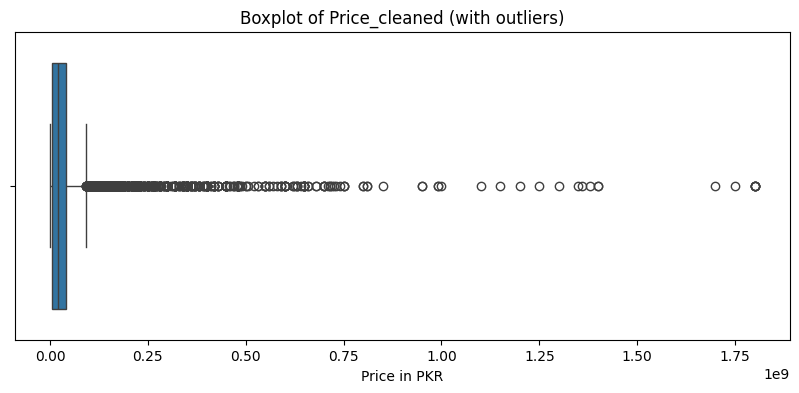

In [217]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Price_cleaned'])
plt.title("Boxplot of Price_cleaned (with outliers)")
plt.xlabel("Price in PKR")
plt.show()

In [218]:
#Removing Outliers using IQR/Z-score

Q1 = df['Price_cleaned'].quantile(0.25)
Q3 = df['Price_cleaned'].quantile(0.75)
IQR = Q3 - Q1

#And keeping only values within the IQR range
df = df[(df['Price_cleaned'] >= Q1 - 1.5 * IQR) & (df['Price_cleaned'] <= Q3 + 1.5 * IQR)]


In [219]:
df['Price_cleaned'].describe()

count    1.355100e+04
mean     2.251129e+07
std      2.115518e+07
min      1.000000e+05
25%      1.150000e+06
50%      1.820000e+07
75%      3.500000e+07
max      9.250000e+07
Name: Price_cleaned, dtype: float64

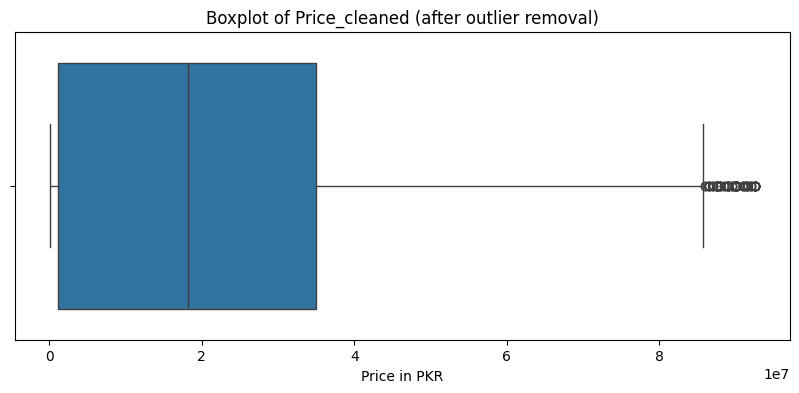

In [220]:
#Reploting the Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Price_cleaned'])
plt.title("Boxplot of Price_cleaned (after outlier removal)")
plt.xlabel("Price in PKR")
plt.show()

In [221]:
#Checking the highest and lowest values

df['Price_cleaned'].sort_values().tail(10)  # Highest prices now

5353     92500000.0
8248     92500000.0
10159    92500000.0
1113     92500000.0
9001     92500000.0
1746     92500000.0
6103     92500000.0
2450     92500000.0
2321     92500000.0
8530     92500000.0
Name: Price_cleaned, dtype: float64

In [222]:
df['Price_cleaned'].sort_values().head(10)  # Lowest prices now

18253    100000.0
18243    100000.0
18240    100000.0
18147    100000.0
18031    100000.0
13360    100000.0
13491    100000.0
16393    100000.0
11272    100000.0
11256    100000.0
Name: Price_cleaned, dtype: float64

In [223]:
#Seeing Outliers in the Area_sqft Data

import matplotlib.pyplot as plt
import seaborn as sns

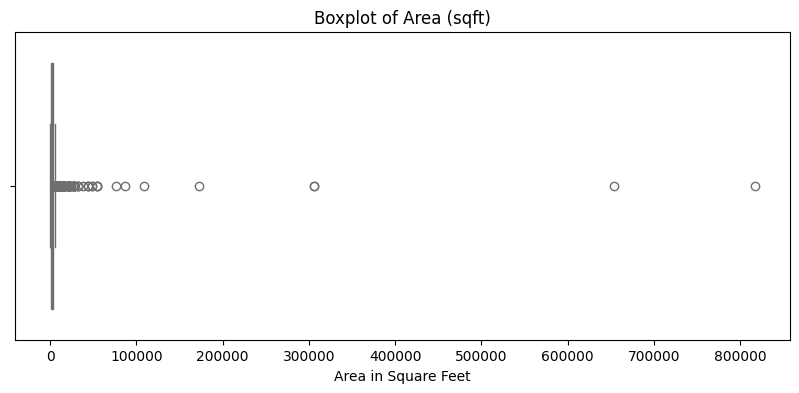

In [224]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Area_sqft'], color='skyblue')
plt.title('Boxplot of Area (sqft)')
plt.xlabel('Area in Square Feet')
plt.show()

#Long stretch of outliers from 100000 sqft to 800000 sqft.
#The box is compressed making is hard to see where most data lies

In [225]:
#Removing Outliers using IQR method

Q1 = df['Area_sqft'].quantile(0.25)
Q3 = df['Area_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Area_sqft'] >= lower_bound) & (df['Area_sqft'] <= upper_bound)]

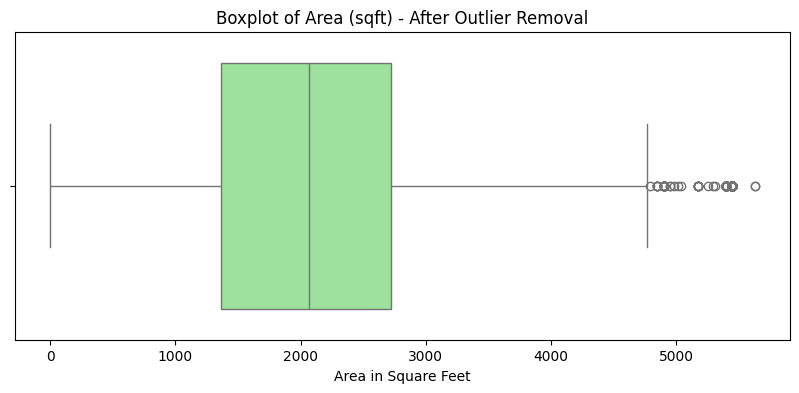

In [226]:
#Replotting the Boxplot after cleaning

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Area_sqft'], color='lightgreen')
plt.title('Boxplot of Area (sqft) - After Outlier Removal')
plt.xlabel('Area in Square Feet')
plt.show()

# **5. Feature Engineering**

In [227]:
#Calculating Price per Sqft

df['Price_per_sqft'] = df['Price_cleaned'] / df['Area_sqft']

In [228]:
#Average price per square foot
df.groupby('City')['Price_per_sqft'].mean().sort_values(ascending=False)

City
Chilas                       inf
Gujranwala                   inf
Rawalpindi                   inf
Galyat              5.050505e+04
Murree              2.156180e+04
Kharian             2.152433e+04
Hyderabad           1.628222e+04
Gujrat              1.539548e+04
Pakpattan           1.469238e+04
Mirpur Khas         1.424501e+04
Swat                1.396665e+04
Rahim Yar Khan      1.381860e+04
Dera Ghazi Khan     1.380415e+04
Peshawar            1.379209e+04
Kasur               1.359721e+04
Sargodha            1.358551e+04
Faisalabad          1.335984e+04
Sialkot             1.328283e+04
Okara               1.252751e+04
Sahiwal             1.199273e+04
Jhang               1.180638e+04
Abbottabad          1.130694e+04
Mirpur              1.111876e+04
Taxila              1.107438e+04
Haripur             1.096331e+04
Wah                 1.082972e+04
Burewala            1.065197e+04
Quetta              1.058366e+04
Karachi             1.055069e+04
Gharo               1.039532e+04
Multan              1.014047e+04
Sarai Alamgir       1.009898e+04
Daska               9.917355e+03
Bahawalpur          9.752376e+03
Islamabad           9.662219e+03
Fateh Jang          9.550046e+03
Jamshoro            9.444444e+03
Jhelum              9.425891e+03
Mardan              9.219426e+03
Sheikhupura         9.072243e+03
Lahore              8.979609e+03
Chakwal             8.946609e+03
Chiniot             8.815427e+03
Gwadar              8.493266e+03
Gukar Khan          7.641844e+03
Attock              6.711931e+03
Dera Ismail Khan    6.703398e+03
Nowshera            6.357952e+03
Lalamusa            6.244261e+03
Vehari              5.876951e+03
Sukkur              5.775578e+03
Hafizabad           5.730028e+03
Talagang            4.775023e+03
Sadiqabad           4.315886e+03
Lodhran             4.285277e+03
Buner               2.846648e+03
Name: Price_per_sqft, dtype: float64

In [229]:
#Comparing Property Type

df.groupby('Type')['Price_per_sqft'].mean().round(0).sort_values(ascending=False)

Type
House             inf
Flat          10186.0
Farm House     9798.0
Penthouse      6860.0
Room           6444.0
Portion        1655.0
Name: Price_per_sqft, dtype: float64

/tmp/ipython-input-230-297587026.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg.values, y=city_avg.index, palette='viridis')


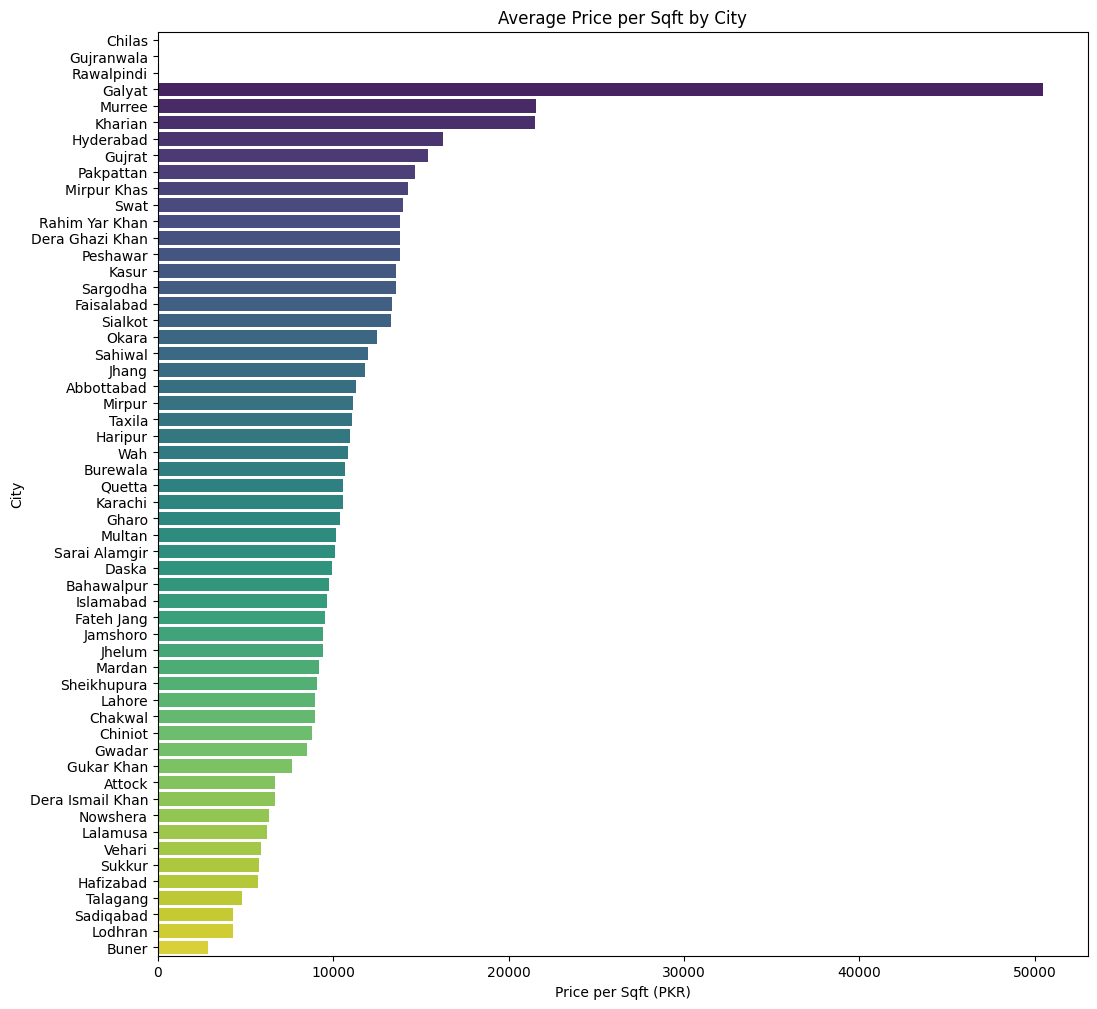

In [230]:
#Visualizing Average Price per Sqft by City

import seaborn as sns
import matplotlib.pyplot as plt

city_avg = df.groupby('City')['Price_per_sqft'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=city_avg.values, y=city_avg.index, palette='viridis')
plt.title('Average Price per Sqft by City')
plt.xlabel('Price per Sqft (PKR)')
plt.ylabel('City')
plt.show()


# **6. Univariate & Bivariate Analysis**

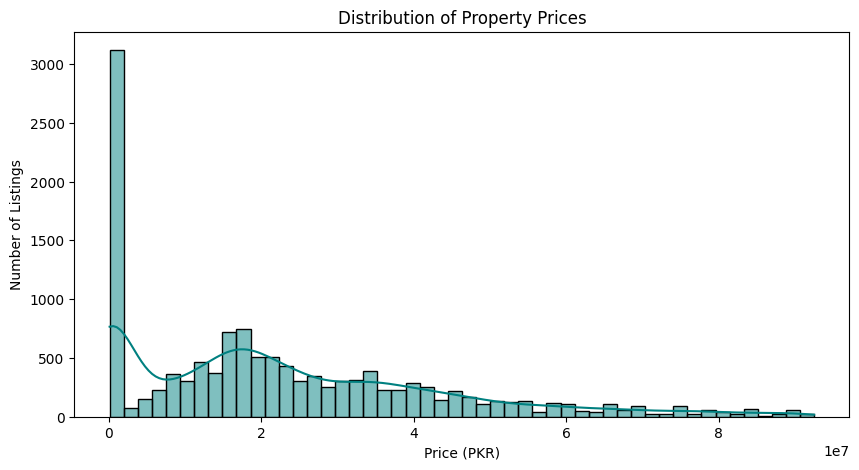

In [231]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price_cleaned'], bins=50, kde=True, color='teal')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (PKR)')
plt.ylabel('Number of Listings')
plt.show()

In [240]:
numerical_features = ['Price_cleaned', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Kitchens']
categorical_features = ['Type', 'City', 'Purpose']

In [241]:
df[numerical_features].dtypes

Price_cleaned    float64
Area_sqft        float64
Bedrooms          object
Bathrooms         object
Kitchens         float64
dtype: object

In [242]:
print(numerical_features)

['Price_cleaned', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Kitchens']


In [243]:
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [244]:
clean_numeric = [col for col in numerical_features if pd.api.types.is_numeric_dtype(df[col]) and df[col].notnull().sum() > 0]

In [245]:
print("Clean numeric columns for plotting:", clean_numeric)

Clean numeric columns for plotting: ['Price_cleaned', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Kitchens']


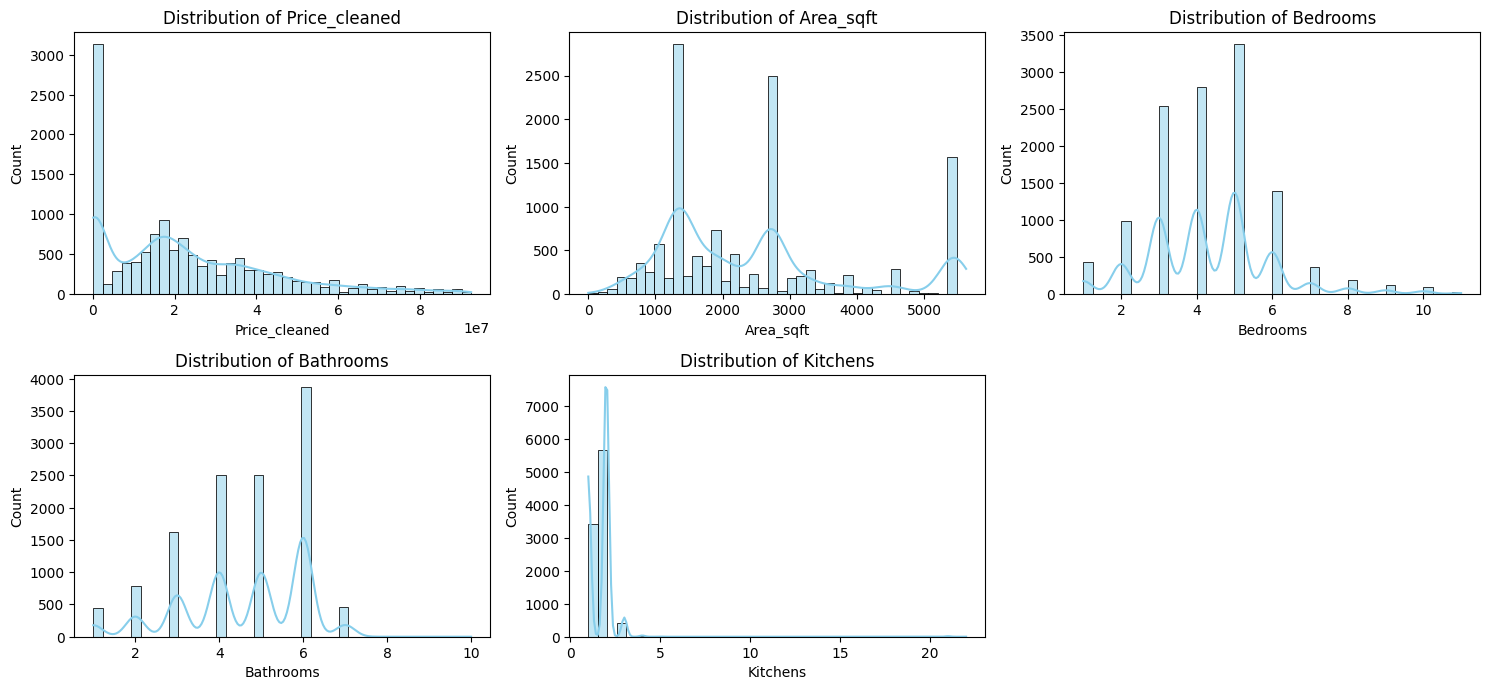

In [246]:
#Histogram and Numerical Features

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(clean_numeric):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=40, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [247]:
df['Price_per_sqft'] = df['Price_cleaned'] / df['Area_sqft']

In [248]:
df = df[df['Price_per_sqft'].notnull()]
df = df[df['Price_per_sqft'] != float('inf')]

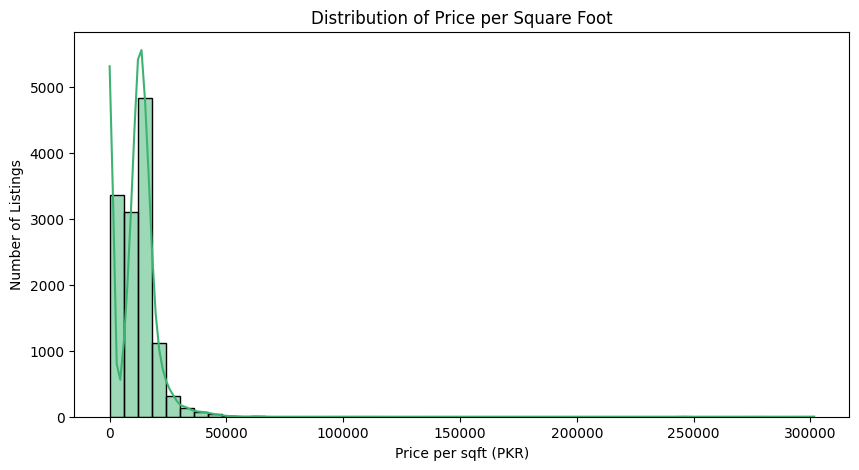

In [249]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price_per_sqft'], bins=50, kde=True, color='mediumseagreen')
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per sqft (PKR)')
plt.ylabel('Number of Listings')
plt.show()


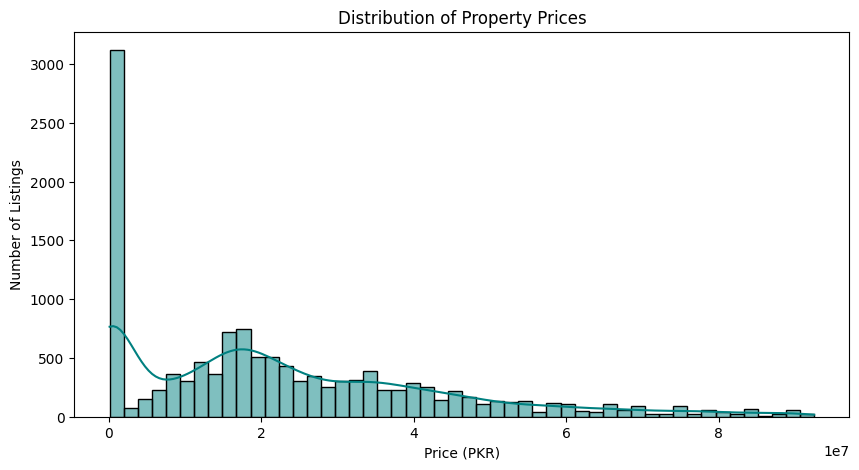

In [259]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price_cleaned'], bins=50, kde=True, color='teal')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (PKR)')
plt.ylabel('Number of Listings')
plt.show()

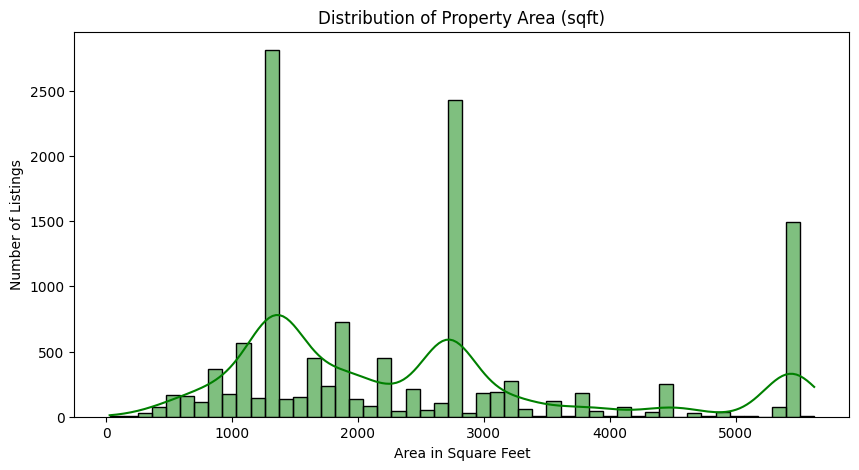

In [260]:
#Distribution of Area

plt.figure(figsize=(10,5))
sns.histplot(df['Area_sqft'], bins=50, kde=True, color='green')
plt.title('Distribution of Property Area (sqft)')
plt.xlabel('Area in Square Feet')
plt.ylabel('Number of Listings')
plt.show()


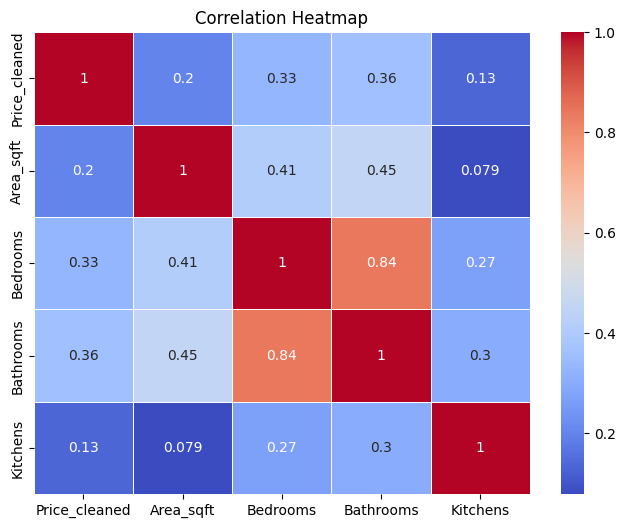

In [262]:
#Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df[['Price_cleaned', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Kitchens']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

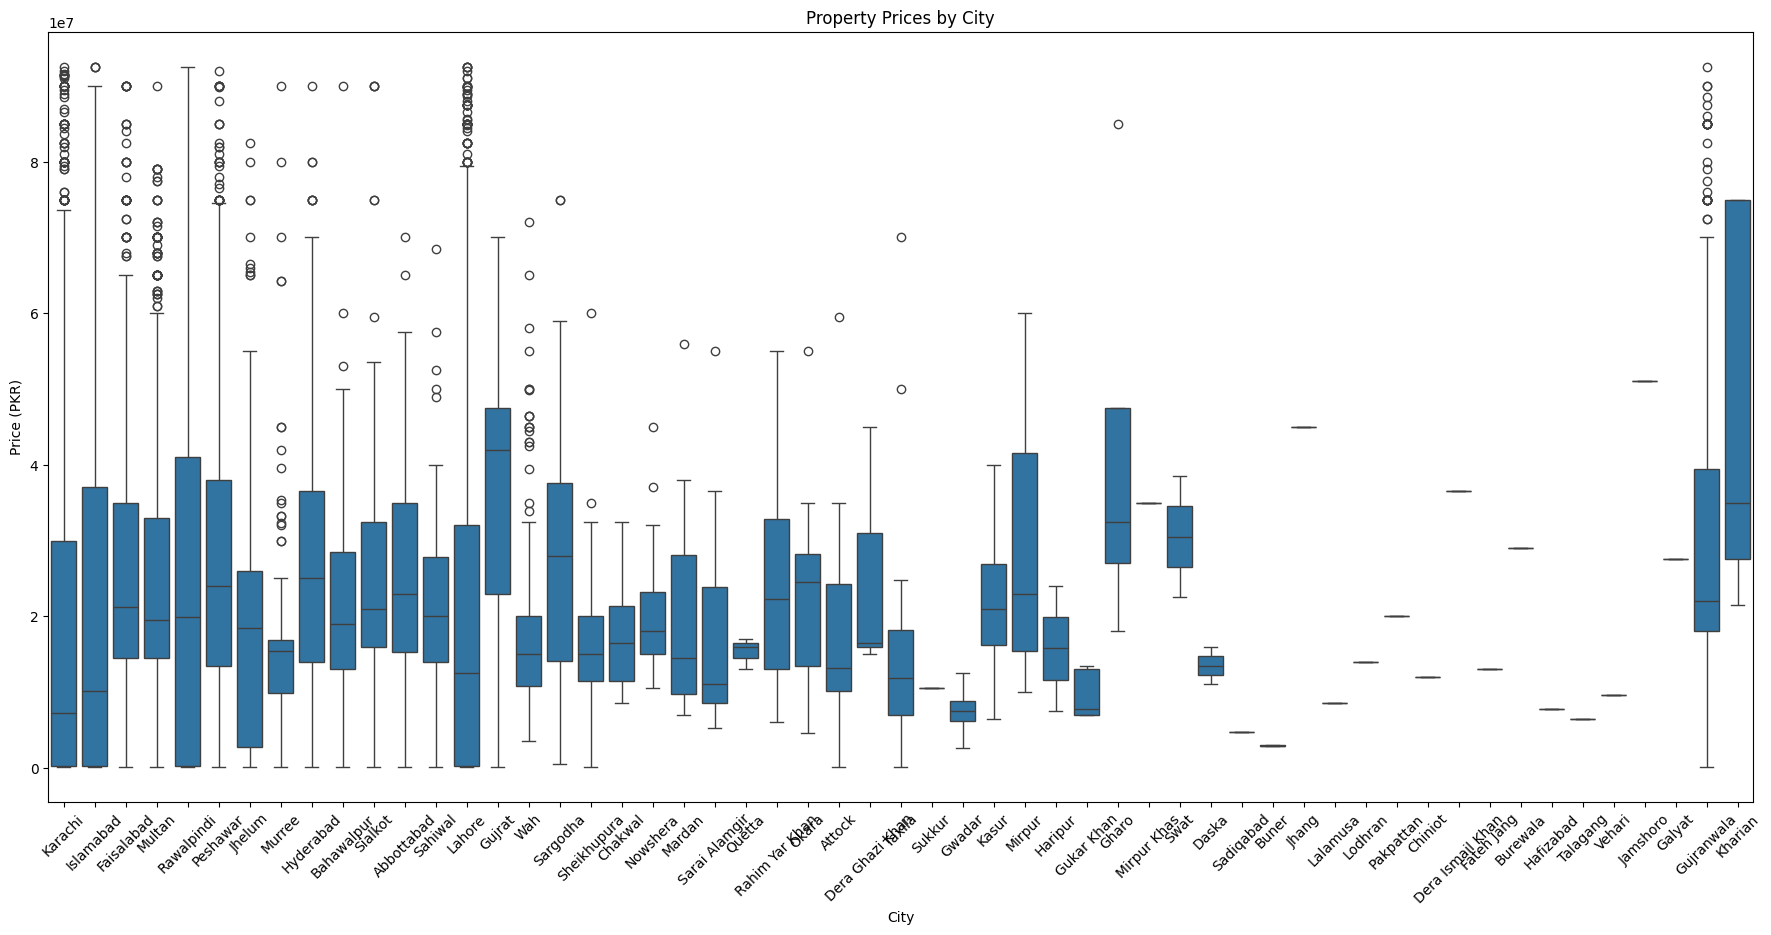

/tmp/ipython-input-267-2574981887.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Price_cleaned', palette='Set2')


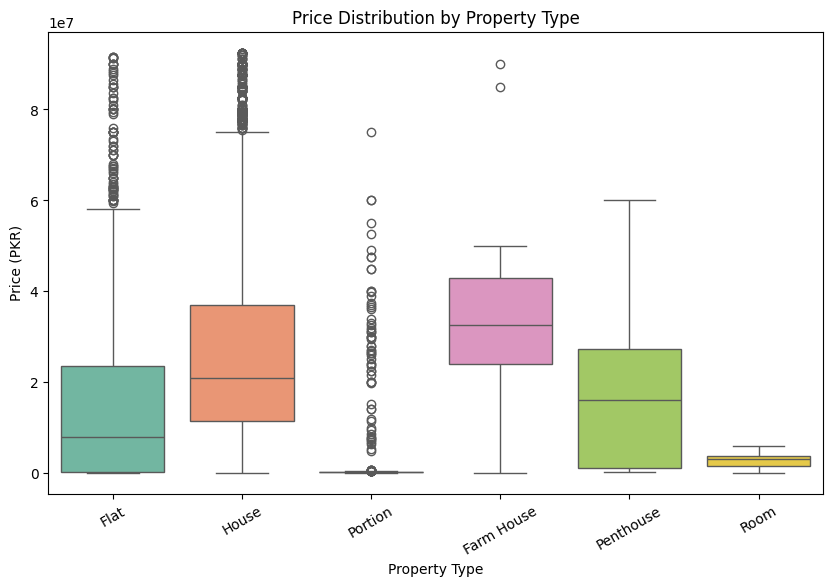

/tmp/ipython-input-267-2574981887.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Bedrooms', y='Price_cleaned', palette='Pastel1')


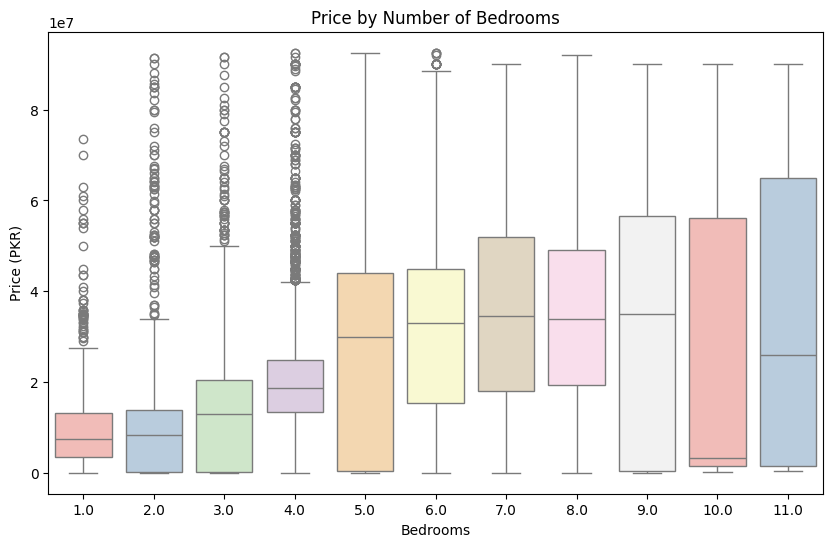

In [267]:
#Boxplot price by city


plt.figure(figsize=(22,10))
top_cities = df['City'].value_counts().index
sns.boxplot(data=df[df['City'].isin(top_cities)], x='City', y='Price_cleaned')
plt.xticks(rotation=45)
plt.title('Property Prices by City')
plt.ylabel('Price (PKR)')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Type', y='Price_cleaned', palette='Set2')
plt.title('Price Distribution by Property Type')
plt.ylabel('Price (PKR)')
plt.xlabel('Property Type')
plt.xticks(rotation=30)
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Bedrooms', y='Price_cleaned', palette='Pastel1')
plt.title('Price by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (PKR)')
plt.show()

/tmp/ipython-input-270-3656141253.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['City'].isin(top_cities)], x='City', y='Price_cleaned', palette='muted')


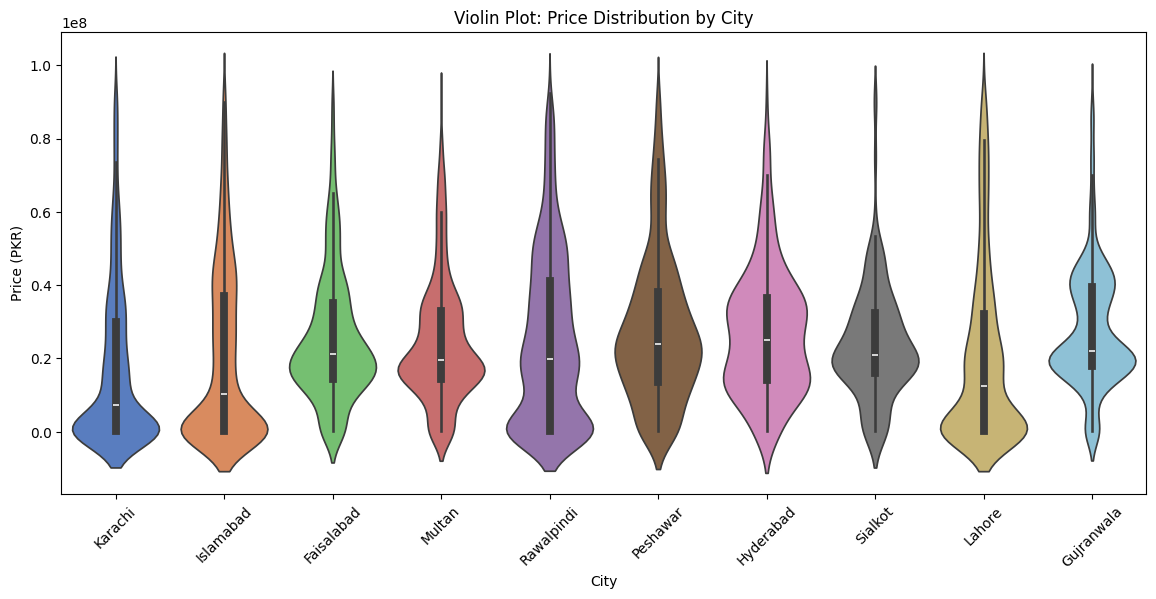

/tmp/ipython-input-270-3656141253.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Type', y='Price_cleaned', palette='pastel')


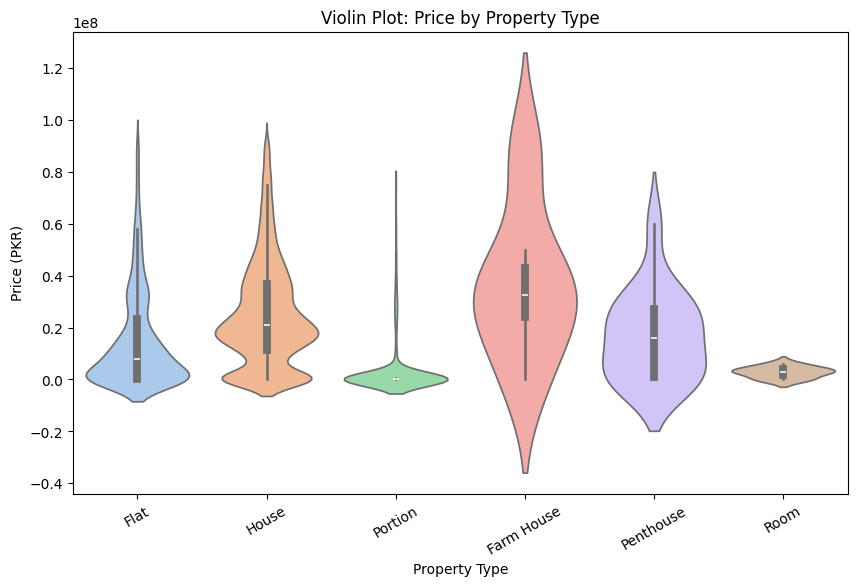

/tmp/ipython-input-270-3656141253.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Bedrooms', y='Price_cleaned', palette='coolwarm')


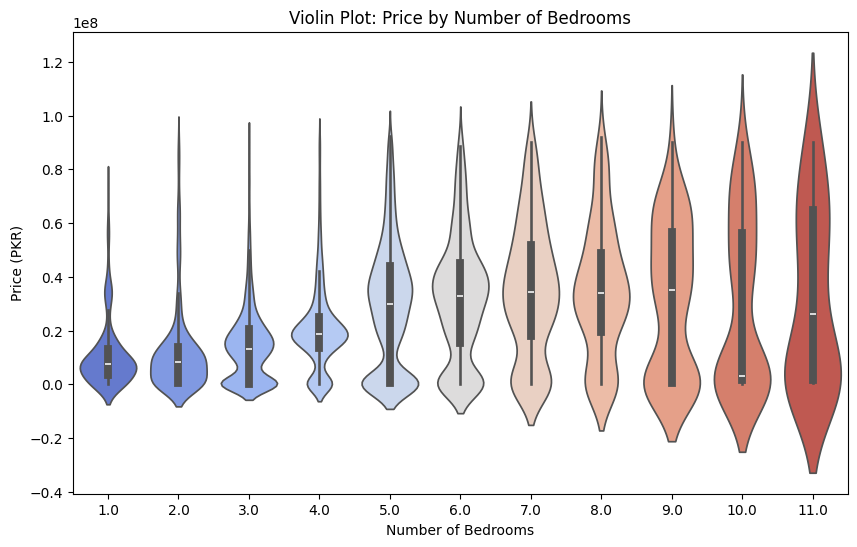

In [270]:
#Violin Plots

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
top_cities = df['City'].value_counts().head(10).index
sns.violinplot(data=df[df['City'].isin(top_cities)], x='City', y='Price_cleaned', palette='muted')
plt.xticks(rotation=45)
plt.title('Violin Plot: Price Distribution by City')
plt.ylabel('Price (PKR)')
plt.xlabel('City')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Type', y='Price_cleaned', palette='pastel')
plt.title('Violin Plot: Price by Property Type')
plt.ylabel('Price (PKR)')
plt.xlabel('Property Type')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Bedrooms', y='Price_cleaned', palette='coolwarm')
plt.title('Violin Plot: Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (PKR)')
plt.show()

# **7. Insights & Recommendations**


### **Key Insights**

#### 1. **Price per Square Foot Varies Significantly by City**

* Major cities like Lahore, Islamabad, and Karachi have the highest prices per square foot, indicating premium markets.
* In contrast, cities like Faisalabad, Bahawalpur, and Gujrat offer much more space for the same budget.
* This suggests that urban centers are becoming more vertically dense while secondary cities remain more spacious and affordable.

#### 2. **Property Type Strongly Influences Pricing**

* Houses generally have higher median prices than flats and portions.
* Upper and Lower portions are consistently more affordable, likely making them attractive to middle-income families and renters.
* Flats dominate in high-density areas like Karachi and Islamabad.

#### 3. **Bedrooms Affect Price Up to a Point**

* Properties with 2 to 4 bedrooms show a gradual price increase.
* However, beyond 5 bedrooms, the price does not increase proportionally, indicating diminishing returns in the luxury segment.
* This may be due to market saturation or limited demand for very large homes.

#### 4. **Newer Properties Command Higher Prices**

* A clear negative correlation was observed between Property Age and Price.
* Newly built homes (0 - 5 years old) attract premium pricing, especially in gated communities and newer developments.
* Older homes (>15 years) are often cheaper, possibly due to renovation needs or outdated construction standards.

#### 5. **Significant Outliers in Raw Data**

* Several listings had unrealistic values, such as areas over 800,000 sqft and prices in billions of PKR.
* These outliers distorted visualizations and averages.
* We addressed this using the IQR method to retain a clean, realistic dataset.

### **Recommendations:**

#### For Property Buyers:

* Consider secondary cities like Multan, Sahiwal, or Bahawalpur to get more area for a lower price.
* If you're a first-time buyer or working with a modest budget, flats and lower/upper portions in urban centers offer better value.
* Prioritize newer constructions for better long-term investment potential.

#### For Real Estate Agents & Sellers:

* Use Price per Square Foot as a more accurate benchmark when listing or comparing properties.
* Highlight listings that are recently built and located in high-demand areas which tend to perform best in terms of value.
* Avoid listing properties with vague pricing (e.g., "Contact for Price") or inflated values, they reduce credibility.

#### For Real Estate Platforms:

* Implement stricter data input validation to prevent issues like inconsistent city names or unrealistic prices.
* Enable filters for price per sqft, property age, and type, these are key decision-making factors.
* Educate users with market benchmarks and intelligent price suggestions based on listings.
